<a href="https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/keras_applications_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" style="padding-right:10px;" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/university_oviedo_logo.png" width=300 px>

This notebook is from the Course "***Computer vision in the new era of Artificial Intelligence and Deep Learning***", or "*Visión por computador en la nueva era de la Inteligencia Artificial y el Deep Learning*" (ES) from the "Second quarter university extension courses" that the University of Oviedo is offering (05/04/2021 - 16/04/2021)

<[Github Repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course) | [Course Web Page Information](https://www.uniovi.es/estudios/extension/cursos2c/-/asset_publisher/SEp0PJi4ISGo/content/vision-por-computador-en-la-nueva-era-de-la-inteligencia-artificial-y-el-deep-learning?redirect=%2Festudios%2Fextension%2Fcursos2c)>

# Summary
Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning.

In this example, we are going to see how to use them for transfer learning.









# Download the dataset from Kaggle

We will download a dataset from Kaggle. A detail information about how to install kaggle API, configure it and check that it works see the notebook "set_up_kaggle_api_in_colab.ipynb" in this [course repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course)

In [ ]:
# Install kaggle API
! pip install kaggle
# Force install the latest version
! pip install --upgrade --force-reinstall --no-deps kaggle

In [2]:
# Upload 'kaggle.json' file to Colab
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
# Move the uploaded file to a location ~/.kaggle/kaggle.json. 
# Additionally, you need to give proper permissions to the file (since this is a hidden folder). 
# Finally delete the kaggle.json file from the initial location
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! rm kaggle.json

In [4]:
# Checking that it works (optional). For example, run the following command:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         95           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        143           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        327           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2065           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      16100           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4178           False  
connectx

In [ ]:
# https://colab.research.google.com/drive/1vzEDAX-3ol7gcZ7qmKuwn8zUld524sUZ#scrollTo=hogQDF7KYsmC
# https://blog.roboflow.com/how-to-train-efficientnet/

# http://digital-thinking.de/keras-transfer-learning-for-image-classification-with-effificientnet/
# https://github.com/digital-thinking/ann-jupyter-notebooks/tree/master/TransferLearning-EfficientNet


In [5]:
# https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder
# https://ai.stanford.edu/~jkrause/cars/car_dataset.html
!kaggle datasets download -d jutrera/stanford-car-dataset-by-classes-folder

 99% 1.81G/1.83G [00:22<00:00, 78.5MB/s]
100% 1.83G/1.83G [00:22<00:00, 88.4MB/s]


In [ ]:
# Unzip the dataset:
!unzip stanford-car-dataset-by-classes-folder

In [7]:
# Path of the both train and test directories
train_dir='/content/car_data/car_data/train'
test_dir='/content/car_data/car_data/test'

In [67]:
# According to the creator of Keras François Chollet, Keras ImageDataGenerator() 
# lets us quickly set-up python generators that automatically turn image files into 
# preprocessed tensors that can be fed directly into models during training.

import tensorflow as tf

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.2,  
    rotation_range = 5,
    horizontal_flip=True)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

In [68]:
batch_size = 32
IMG_SIZE = 224
input_shape = (IMG_SIZE, IMG_SIZE)

In [69]:
train_generator=train_datagen.flow_from_directory(train_dir,
                                            class_mode="categorical", 
                                            target_size=input_shape, 
                                            batch_size=batch_size)


validation_generator=test_datagen.flow_from_directory(test_dir,
                                            class_mode="categorical", 
                                            target_size=input_shape, 
                                            batch_size=batch_size)

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


In [70]:
# Get the mapping of classes to indexes created by the generator: {generator.class_indices}
label_map = train_generator.class_indices
print(label_map)

{'AM General Hummer SUV 2000': 0, 'Acura Integra Type R 2001': 1, 'Acura RL Sedan 2012': 2, 'Acura TL Sedan 2012': 3, 'Acura TL Type-S 2008': 4, 'Acura TSX Sedan 2012': 5, 'Acura ZDX Hatchback 2012': 6, 'Aston Martin V8 Vantage Convertible 2012': 7, 'Aston Martin V8 Vantage Coupe 2012': 8, 'Aston Martin Virage Convertible 2012': 9, 'Aston Martin Virage Coupe 2012': 10, 'Audi 100 Sedan 1994': 11, 'Audi 100 Wagon 1994': 12, 'Audi A5 Coupe 2012': 13, 'Audi R8 Coupe 2012': 14, 'Audi RS 4 Convertible 2008': 15, 'Audi S4 Sedan 2007': 16, 'Audi S4 Sedan 2012': 17, 'Audi S5 Convertible 2012': 18, 'Audi S5 Coupe 2012': 19, 'Audi S6 Sedan 2011': 20, 'Audi TT Hatchback 2011': 21, 'Audi TT RS Coupe 2012': 22, 'Audi TTS Coupe 2012': 23, 'Audi V8 Sedan 1994': 24, 'BMW 1 Series Convertible 2012': 25, 'BMW 1 Series Coupe 2012': 26, 'BMW 3 Series Sedan 2012': 27, 'BMW 3 Series Wagon 2012': 28, 'BMW 6 Series Convertible 2007': 29, 'BMW ActiveHybrid 5 Sedan 2012': 30, 'BMW M3 Coupe 2012': 31, 'BMW M5 Sed

In [71]:
# This function is used to return the key from a value in the dictionary
# To do it, we iterate over all items in the dictionary
# and if the value is the same, we return its corresponding key
def get_key(my_dict, val):
    for key, value in my_dict.items():
         if val == value:
             return key
 
    return "key doesn't exist"

In [72]:
# We test this function with the 'label_map' created before
get_key(label_map, 0)

'AM General Hummer SUV 2000'

In [74]:
# Other option to get the class name is to 'invert' the train_generator.class_indices dictionary:
inverted_label_map = {v: k for k, v in train_generator.class_indices.items()} 
print(inverted_label_map)

{0: 'AM General Hummer SUV 2000', 1: 'Acura Integra Type R 2001', 2: 'Acura RL Sedan 2012', 3: 'Acura TL Sedan 2012', 4: 'Acura TL Type-S 2008', 5: 'Acura TSX Sedan 2012', 6: 'Acura ZDX Hatchback 2012', 7: 'Aston Martin V8 Vantage Convertible 2012', 8: 'Aston Martin V8 Vantage Coupe 2012', 9: 'Aston Martin Virage Convertible 2012', 10: 'Aston Martin Virage Coupe 2012', 11: 'Audi 100 Sedan 1994', 12: 'Audi 100 Wagon 1994', 13: 'Audi A5 Coupe 2012', 14: 'Audi R8 Coupe 2012', 15: 'Audi RS 4 Convertible 2008', 16: 'Audi S4 Sedan 2007', 17: 'Audi S4 Sedan 2012', 18: 'Audi S5 Convertible 2012', 19: 'Audi S5 Coupe 2012', 20: 'Audi S6 Sedan 2011', 21: 'Audi TT Hatchback 2011', 22: 'Audi TT RS Coupe 2012', 23: 'Audi TTS Coupe 2012', 24: 'Audi V8 Sedan 1994', 25: 'BMW 1 Series Convertible 2012', 26: 'BMW 1 Series Coupe 2012', 27: 'BMW 3 Series Sedan 2012', 28: 'BMW 3 Series Wagon 2012', 29: 'BMW 6 Series Convertible 2007', 30: 'BMW ActiveHybrid 5 Sedan 2012', 31: 'BMW M3 Coupe 2012', 32: 'BMW M5

In [75]:
# When you call the next() function, your data generator loads your first batch. 
# The result should contain both train data and train label. You can access them by index.
image_batch, label_batch = next(train_generator)

In [80]:
import matplotlib.pyplot as plt
import numpy as np

def show_batch(image_batch, label_batch):
    plt.figure(figsize=(16,20))
    for n in range(32):
        ax = plt.subplot(8,4,n+1)
        plt.imshow(image_batch[n])        

        # Get the index of the label (label is one-hot encoded)
        val = np.argmax(label_batch[n])

        # Get the label with 'method 1'        
        label = get_key(label_map, val)
        # print(label)

        # Get the label with 'method 2'
        label = inverted_label_map[val]
        # print(label)

        plt.title(label)

        plt.axis('off')

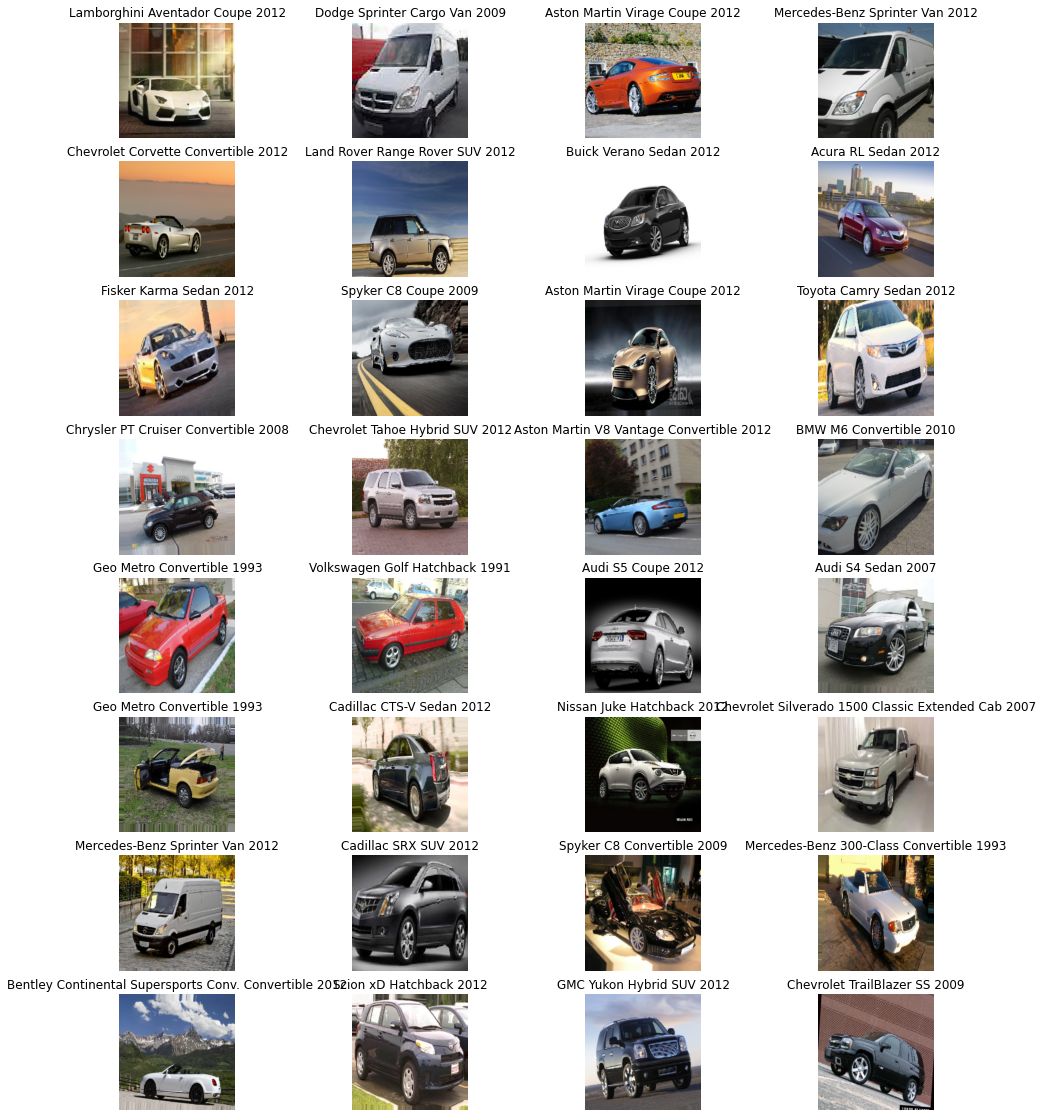

In [81]:
show_batch(image_batch, label_batch)

In [82]:
# Get the number of classes:
NUM_CLASSES = len(train_generator.class_indices)
print(NUM_CLASSES)

196


In [83]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers

def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    # x = img_augmentation(inputs)
    model = EfficientNetB0(include_top=False, input_tensor=inputs, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [16]:
model = build_model(num_classes=NUM_CLASSES)

16711680/16705208 [==============================] - 0s 0us/step


In [ ]:
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=train_generator.samples // batch_size + 1,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size + 1,
                    epochs=10,                           
                    workers=8,             
                    max_queue_size=32,             
                    verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
  3/255 [..............................] - ETA: 24:22 - loss: 6.6212 - accuracy: 0.0000e+00

In [ ]:
import matplotlib.pyplot as plt

def plot_hist(hist):
    # Plot accuracy
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()
    # Plot loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

plot_hist(history)